In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/train_3oo.csv')
# train_3oo
# train_df1_minmax

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'revenue', 'profit']] = scaler.fit_transform(df[['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'revenue', 'profit']])

In [30]:
df['Gains']

0        0.000000
1        0.000000
2        0.706602
3        0.000000
4        0.000000
           ...   
19995    0.000000
19996    0.000000
19997    0.000000
19998    0.000000
19999    0.000000
Name: Gains, Length: 20000, dtype: float64

In [6]:
# pd.set_option('display.max_columns', None)

In [16]:
# numeric_columns = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'revenue', 'profit']

In [17]:
# # 스케일러 MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# numeric_columns = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'revenue', 'profit']

# mm_sc = MinMaxScaler()

# for i in numeric_columns :
#   # Scaler
#   mm_sc = MinMaxScaler()
#   # fit
#   mm_sc.fit(df[[i]])
#   # transform
#   df[i] = mm_sc.transform(df[[i]])
#   # reset
#   mm_sc = ''

In [18]:
df['revenue']

0        0.421242
1        0.421242
2        0.830193
3        0.421242
4        0.421242
           ...   
19995    0.421242
19996    0.421242
19997    0.421242
19998    0.421242
19999    0.421242
Name: revenue, Length: 20000, dtype: float64

In [ ]:
# # 스케일러 StandardScaler

# from sklearn.preprocessing import StandardScaler

# for i in numeric_columns :
#   # Scaler
#   sd_sc = StandardScaler()
#   # fit
#   sd_sc.fit(df[[i]])
#   # transform
#   df[i] = sd_sc.transform(df[[i]])
#   # reset
#   sd_sc = ''

In [ ]:
# # 스케일러 RobustScaler
# from sklearn.preprocessing import RobustScaler

# rb_sc = RobustScaler()

# for i in numeric_columns :
#   # Scaler
#   rb_sc = RobustScaler()
#   # fit
#   rb_sc.fit(df[[i]])
#   # transform
#   df[i] = rb_sc.transform(df[[i]])
#   # reset
#   rb_sc = ''

In [ ]:
# # 스케일러 MaxAbsScaler
# from sklearn.preprocessing import MaxAbsScaler

# ma_sc = MaxAbsScaler()

# for i in numeric_columns :
#   # Scaler
#   ma_sc = MaxAbsScaler()
#   # fit
#   ma_sc.fit(df[[i]])
#   # transform
#   df[i] = ma_sc.transform(df[[i]])
#   # reset
#   ma_sc = ''

In [ ]:
df['Working_Week (Yearly)']

0        0.076923
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
19995    1.000000
19996    0.230769
19997    1.000000
19998    0.000000
19999    1.000000
Name: Working_Week (Yearly), Length: 20000, dtype: float64

## 모델링

In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

# 함수 만들기
def label_encoder(df) :
  # 라이브러리 불러오기
  from sklearn.preprocessing import LabelEncoder
  # 인코딩할 칼럼 추출
  df_categorical = df.select_dtypes(include=['object']).columns
  # 식별자 ID 제외하기
  df_categorical = df_categorical.drop('ID')
  # 라벨 인코딩 적용
  label_encoder = LabelEncoder()
  df[df_categorical] = df[df_categorical].apply(label_encoder.fit_transform)

label_encoder(df)

In [ ]:
df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Age_workingage,Age_agegender,Education_univ,Education_group4,Employment_group3,Employment_group5,Martial_group3,Native_yn,Hispanic_yn,Race_yn
0,TRAIN_00000,0.700000,1,15,2,0.076923,20,11,4,0,...,0,13,0,1,2,2,2,1,1,1
1,TRAIN_00001,0.411111,1,1,2,1.000000,6,11,4,0,...,1,7,1,3,2,2,0,1,1,1
2,TRAIN_00002,0.644444,0,12,2,1.000000,11,0,1,0,...,1,10,0,2,2,2,2,1,1,0
3,TRAIN_00003,0.488889,1,12,2,1.000000,19,12,4,0,...,1,9,0,2,2,2,0,1,1,1
4,TRAIN_00004,0.411111,0,12,2,1.000000,19,10,4,0,...,1,6,0,2,2,2,0,1,1,1


In [8]:
# # # features와 label 분리 작업 + 연령대로 머신러닝
X_features = df.loc[:,(df.columns != 'ID') & (df.columns != 'Income')]
y_label = df['Income']

In [9]:
# train_ test분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 42)

In [10]:
# 평가지표
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
import numpy as np

def evaluation(y_test, y_pred) :
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  # MdAPE를 잘 쓰곤 함. 직관적이여서(외부공유)
  mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100
  mape = mean_absolute_percentage_error(y_test,y_pred)
  # MAPE 계산 식 : np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print('rmse : {}, mae : {}, mdape : {}, mape : {}'.format(rmse, mae, mdape, mape ))

In [11]:
from lightgbm import LGBMRegressor

# 모델
lgbm_model = LGBMRegressor()
# 학습
lgbm_model.fit(X_train, y_train)
# 예측
lgbm_pred = lgbm_model.predict(X_test)
# 평가
evaluation(y_test, lgbm_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
rmse : 594.0682728194605, mae : 326.17213741755006, mdape : 57.06601457307521, mape : 6.229012457027959e+17


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

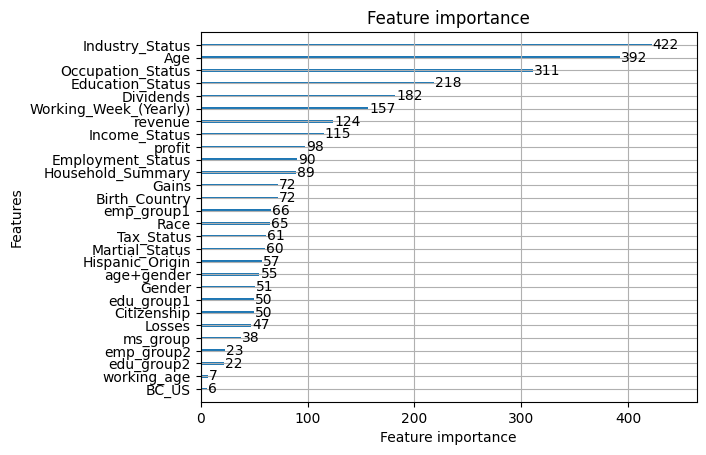

In [12]:
import lightgbm as lgbm

lgbm.plot_importance(lgbm_model)

In [13]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

lgbc=LGBMRegressor()

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500


SelectFromModel(estimator=LGBMRegressor(), threshold='1.25*median')

In [ ]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

12 selected features


In [ ]:
embeded_lgb_feature

['Age',
 'Education_Status',
 'Employment_Status',
 'Working_Week (Yearly)',
 'Industry_Status',
 'Occupation_Status',
 'Household_Summary',
 'Birth_Country',
 'Dividends',
 'Income_Status',
 'Total_Gains',
 'Net_Gains']

In [ ]:
# RFE
from sklearn.feature_selection import RFE

model = LGBMRegressor()
rfe = RFE(model, n_features_to_select=10)

In [ ]:
X_selected = rfe.fit_transform(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 31
[LightGBM] [Info] Start training from score 556.153500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [ ]:
X_train.columns[rfe.support_]

Index(['Age', 'Education_Status', 'Employment_Status', 'Working_Week (Yearly)',
       'Industry_Status', 'Occupation_Status', 'Dividends', 'Income_Status',
       'Total_Gains', 'Net_Gains'],
      dtype='object')

In [ ]:
print("선택된 특성의 인덱스:", rfe.support_)
print("선택된 특성의 랭킹:", rfe.ranking_)

선택된 특성의 인덱스: [ True False  True  True  True  True  True False False False False False
 False False False False  True  True False False  True  True False False
 False False False False False False False False]
선택된 특성의 랭킹: [ 1 10  1  1  1  1  1 11  7  8  5 12  3  2  9 13  1  1 19 20  1  1 18  4
 14 16  6 17 15 21 22 23]


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.5 MB/s eta 0:00:00


 99%|===================| 3946/4000 [00:31<00:00]       

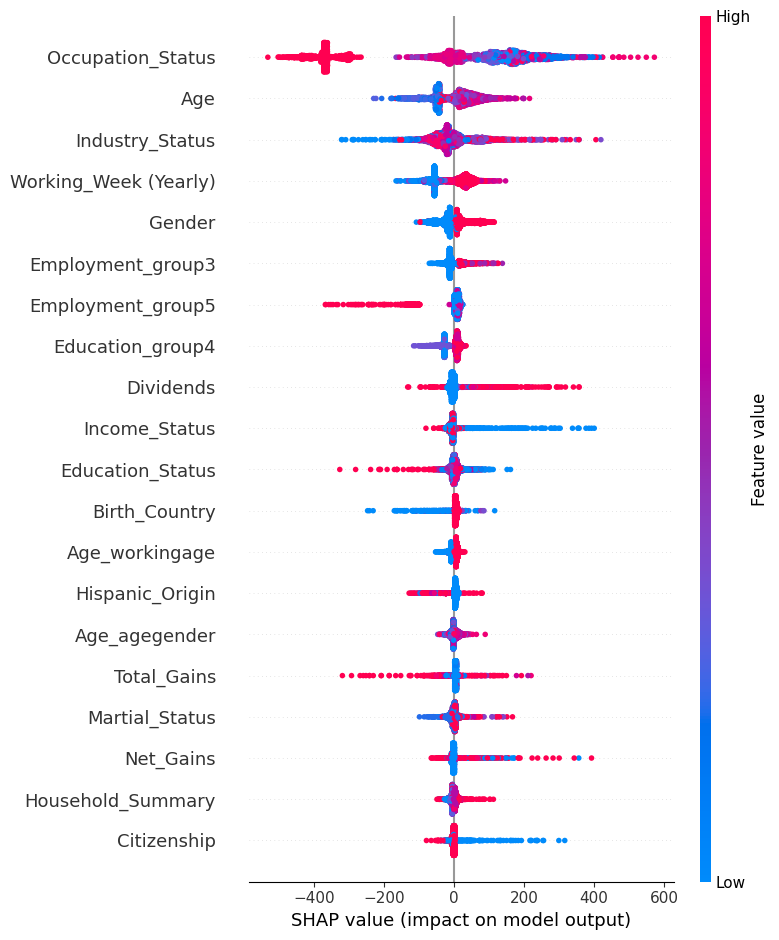

In [ ]:
# shap value
import shap

# SHAP 값 계산
explainer = shap.Explainer(lgbm_model, X_train)
shap_values = explainer(X_test)

# # SHAP summary plot 그리기
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


lg_md = LGBMRegressor()
lg_md.fit(X_train, y_train)

# Permutation Importance 계산
perm_importance = permutation_importance(lg_md, X_train, y_train, n_repeats=30, random_state=42)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500


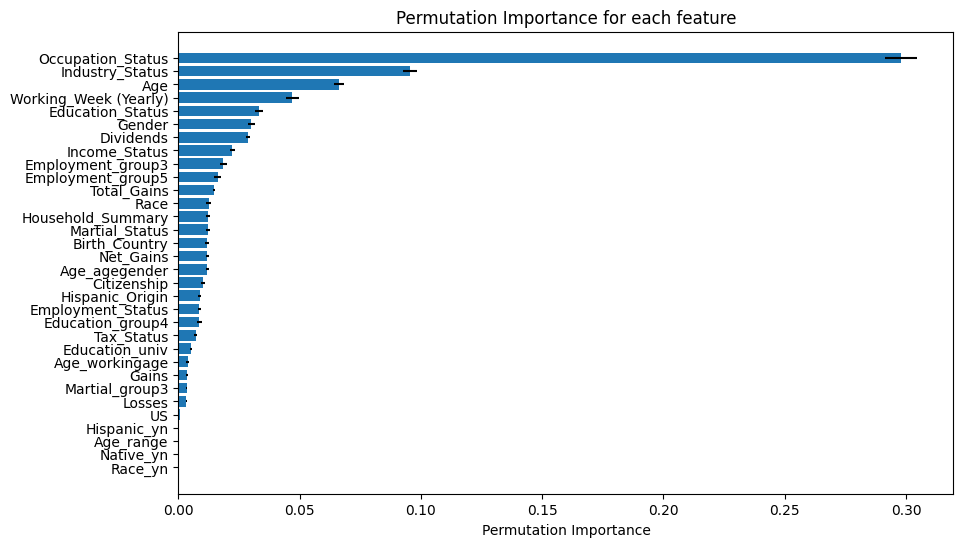

In [ ]:

# 중요도 및 표준 편차 추출
sorted_idx = perm_importance.importances_mean.argsort()
importances = perm_importance.importances_mean[sorted_idx]
std = perm_importance.importances_std[sorted_idx]
feature_names = X_train.columns

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances, xerr=std, align='center')
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for each feature')
plt.show()

In [ ]:
# SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Lasso 회귀 모델 생성 및 특성 선택
lasso_model = Lasso(alpha=0.1)  # alpha는 L1 규제 강도를 조절하는 매개변수
selector = SelectFromModel(lasso_model)
selector.fit(X_train, y_train)

# 선택된 특성 확인
selected_features = feature_names[selector.get_support()]
print("선택된 특성:", selected_features)

선택된 특성: Index(['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Losses', 'Dividends', 'Income_Status',
       'US', 'Age_range', 'Total_Gains', 'Age_workingage', 'Age_agegender',
       'Education_univ', 'Education_group4', 'Employment_group3',
       'Employment_group5', 'Martial_group3', 'Native_yn', 'Hispanic_yn',
       'Race_yn'],
      dtype='object')


In [ ]:
# 선택된 특성만 사용하여 데이터 변환
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 선택된 특성으로 모델 학습

model2 = LGBMRegressor()
model2.fit(X_train_selected, y_train)

# 모델 평가
score = model2.score(X_test_selected, y_test)
print("모델 평가 점수:", score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 30
[LightGBM] [Info] Start training from score 556.153500
모델 평가 점수: 0.2898308210446018


In [ ]:
# 예측
lgbm_pred2 = model2.predict(X_test_selected)
evaluation(y_test, lgbm_pred2)

rmse : 591.2982958912612, mae : 326.28513871778665, mdape : 57.05778745232492, mape : 6.178478100339163e+17
